# `ANÁLISIS DE DATOS DE LOS RATIOS DE EFICIENCIA DE LA EMPRESA NINTENDO`

fuente: https://tools.morningstar.com.mx/mx/stockreport/default.aspx?tab=11&vw=er&SecurityToken=0P0001K4GZ%5D3%5D0%5DE0WWE%24%24ALL&Id=0P0001K4GZ&ClientFund=0&CurrencyId=MXN

LIBRERIAS


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats
from empiricaldist import Pmf, Cdf
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss


In [ ]:
!pip install empiricaldist


Cargar base de datos en CSV:

In [ ]:
df= pd.read_csv("/content/AnalisisEficienciaNintendoCSV.csv")
df


,DATO,2019,2020,2021,2022,2023
0,DIAS DE VENTAS PENDIENTES,22.50,29.46,28.39,30.32,29.74
1,DIAS EN INVENTARIO,72.35,61.43,40.70,70.88,117.93
2,PERIODO DE CUENTAS POR PAGAR,51.59,43.18,49.25,64.69,76.47
3,CICLO DE CONVERSION DE EFECTIVO,43.26,47.71,19.84,36.51,71.19
4,ROTACION DE CUENTAS POR COBRAR,16.22,12.39,12.86,12.04,12.27
5,ROTACION DE EXISTENCIAS,5.04,5.94,8.97,5.15,3.10
6,ROTACION DE ACTIVOS FIJOS,14.51,15.92,21.14,20.09,17.35
7,ROTACION DE ACTIVOS,0.72,0.72,0.80,66.00,0.58


# Colecta y validación de datos

¿Qué tipo de dato son las variables del conjunto de datos?

In [ ]:
(
df
.dtypes
.value_counts()
)

float64    5
object     1
dtype: int64

¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?


In [ ]:
df.shape

(8, 6)

¿Existen valores nulos explícitos en un conjunto de datos?

In [ ]:
(
df
.isnull()
.any()
)

DATO    False
2019    False
2020    False
2021    False
2022    False
2023    False
dtype: bool

No existen valores nuelos en la database

# CONTEOS Y PROPORCIONES

Todas las variables


In [ ]:
df.describe(include= "all")


,DATO,2019,2020,2021,2022,2023
count,8,8.000000,8.000000,8.000000,8.000000,8.000000
unique,8,NaN,NaN,NaN,NaN,NaN
top,DIAS DE VENTAS PENDIENTES,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,28.273750,27.093750,22.743750,38.210000,41.078750
std,NaN,25.008676,21.884382,16.198876,25.945306,42.543157
min,NaN,0.720000,0.720000,0.800000,5.150000,0.580000
25%,NaN,12.142500,10.777500,11.887500,18.077500,9.977500
50%,NaN,19.360000,22.690000,20.490000,33.415000,23.545000
75%,NaN,45.342500,44.312500,31.467500,65.017500,72.510000


Categoricas


In [ ]:
df.describe(include=object)


,DATO
count,8
unique,8
top,DIAS DE VENTAS PENDIENTES
freq,1


<Axes: xlabel='2019', ylabel='DATO'>

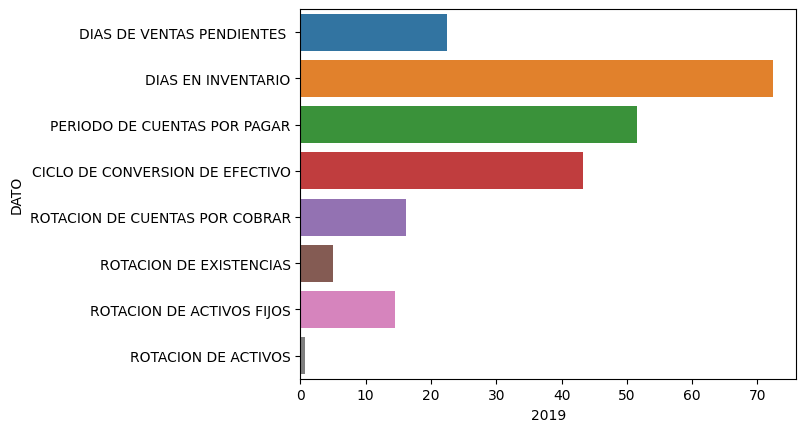

In [ ]:
sns.barplot(x = "2019", y = "DATO", data = df)

# MEDIDAS DE TENDENCIA CENTRAL

In [ ]:
df.mean()


<ipython-input-28-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


2019    28.27375
2020    27.09375
2021    22.74375
2022    38.21000
2023    41.07875
dtype: float64

In [ ]:
df.median()

<ipython-input-24-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


2019    19.360
2020    22.690
2021    20.490
2022    33.415
2023    23.545
dtype: float64

In [ ]:
df.mode()

,DATO,2019,2020,2021,2022,2023
0,CICLO DE CONVERSION DE EFECTIVO,0.72,0.72,0.80,5.15,0.58
1,DIAS DE VENTAS PENDIENTES,5.04,5.94,8.97,12.04,3.10
2,DIAS EN INVENTARIO,14.51,12.39,12.86,20.09,12.27
3,PERIODO DE CUENTAS POR PAGAR,16.22,15.92,19.84,30.32,17.35
4,ROTACION DE ACTIVOS,22.50,29.46,21.14,36.51,29.74
5,ROTACION DE ACTIVOS FIJOS,43.26,43.18,28.39,64.69,71.19
6,ROTACION DE CUENTAS POR COBRAR,51.59,47.71,40.70,66.00,76.47
7,ROTACION DE EXISTENCIAS,72.35,61.43,49.25,70.88,117.93


# MEDIDAS DE DISPERCION

In [ ]:
df.max()

DATO    ROTACION DE EXISTENCIAS
2019                      72.35
2020                      61.43
2021                      49.25
2022                      70.88
2023                     117.93
dtype: object

In [ ]:
df.min()

DATO    CICLO DE CONVERSION DE EFECTIVO
2019                               0.72
2020                               0.72
2021                                0.8
2022                               5.15
2023                               0.58
dtype: object

¿Cuál es el rango de las variables?

In [ ]:
df.max(numeric_only=True)-df.min(numeric_only=True)


2019     71.63
2020     60.71
2021     48.45
2022     65.73
2023    117.35
dtype: float64

¿Cuál es la desviación estándar de las variables?


In [ ]:
df.std()


<ipython-input-32-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


2019    25.008676
2020    21.884382
2021    16.198876
2022    25.945306
2023    42.543157
dtype: float64

¿Cuál es el rango intercuartílico?

In [ ]:
df.quantile()

<ipython-input-37-431199b824ed>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile()


2019    19.360
2020    22.690
2021    20.490
2022    33.415
2023    23.545
Name: 0.5, dtype: float64

# DISTRIBUCIONES

Funciones de probabilidad de masas del año 2019

<Axes: xlabel='2019', ylabel='Probability'>

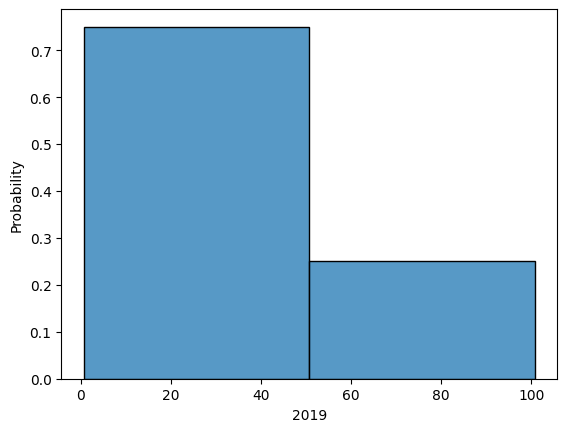

In [ ]:
sns.histplot(
data=df,
x="2019",
binwidth=50,
stat="probability"
)


Funciones empíricas de probabilidad
acumulada del año 2019


<Axes: xlabel='2019', ylabel='Proportion'>

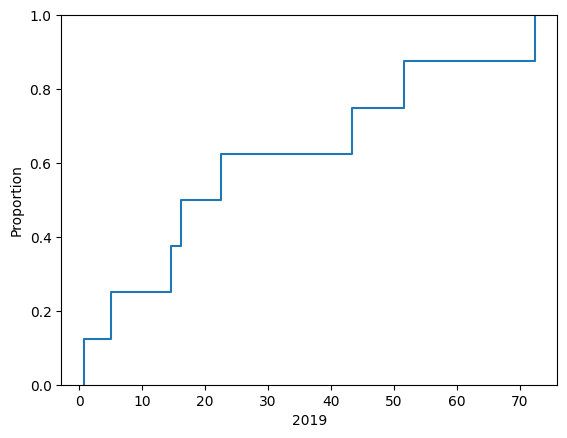

In [ ]:
sns.ecdfplot(
data=df,
x="2019",
)


Comparando distribuciones del año 2019 con el 2020

<Axes: xlabel='2019', ylabel='Proportion'>

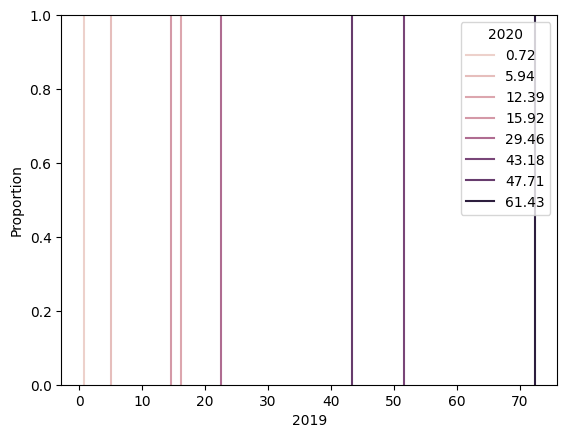

In [ ]:
sns.ecdfplot(
data=df,
x="2019",
hue="2020",
)

# FUNCIONES DE DENSIDAD DE
# PROBABILIDAD

<Axes: xlabel='2019', ylabel='Density'>

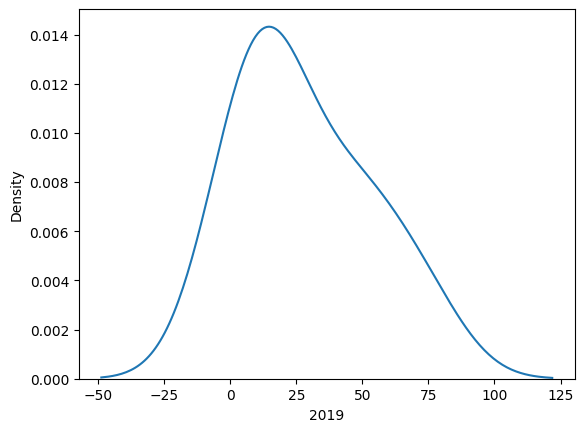

In [ ]:
sns.kdeplot(
data=df,
x="2019",
)


# ANALISIS BIVARIADO


Estableciendo relaciones del año 2019 hasta el año 2023

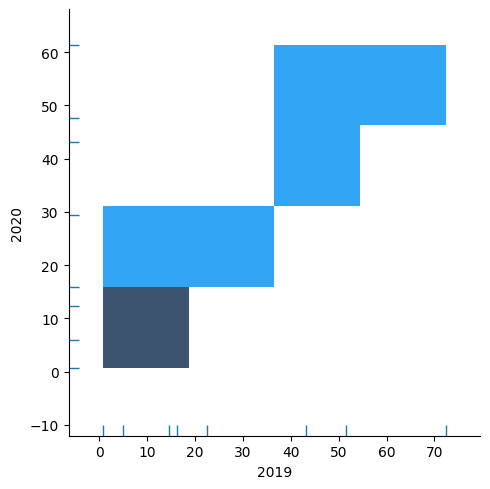

In [ ]:
sns.displot(
data=df,
x="2019",
y="2020",
rug=True,
)

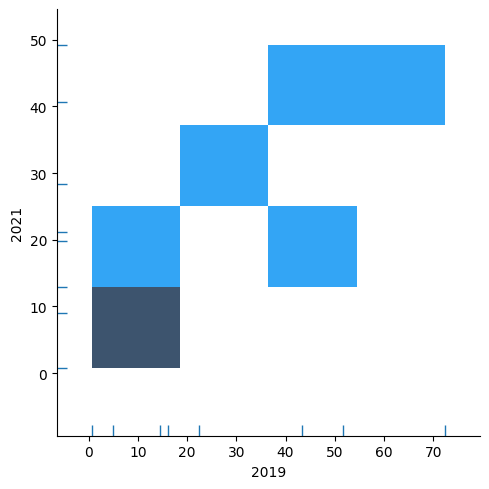

In [ ]:
sns.displot(
data=df,
x="2019",
y="2021",
rug=True,
)

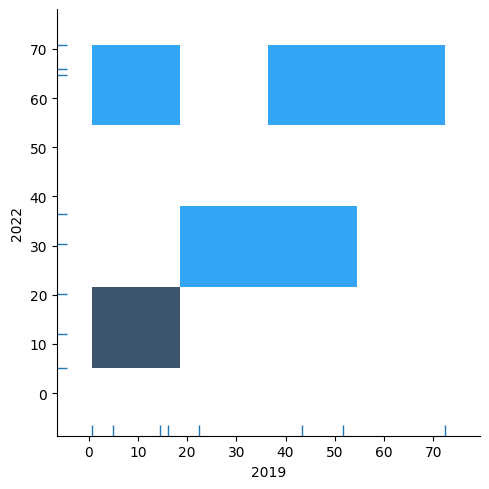

In [ ]:
sns.displot(
data=df,
x="2019",
y="2022",
rug=True,
)

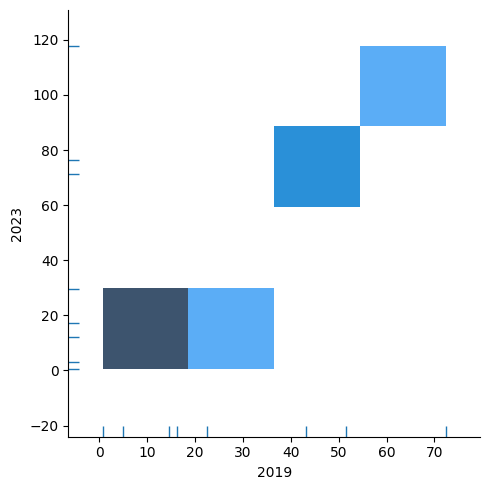

In [ ]:
sns.displot(
data=df,
x="2019",
y="2023",
rug=True,
)

# ESTABLECIMIENTO DE RELACIONES

MATRICES DE CORRELACION

¿Existe una correlación lineal entre algunas de nuestras variables?

In [ ]:
df.corr()


<ipython-input-56-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,2019,2020,2021,2022,2023
2019,1.000000,0.974391,0.846048,0.582276,0.993786
2020,0.974391,1.000000,0.817962,0.515198,0.976227
2021,0.846048,0.817962,1.000000,0.469805,0.808695
2022,0.582276,0.515198,0.469805,1.000000,0.621255
2023,0.993786,0.976227,0.808695,0.621255,1.000000


<ipython-input-57-144dfadc05e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.corr(),


<Axes: >

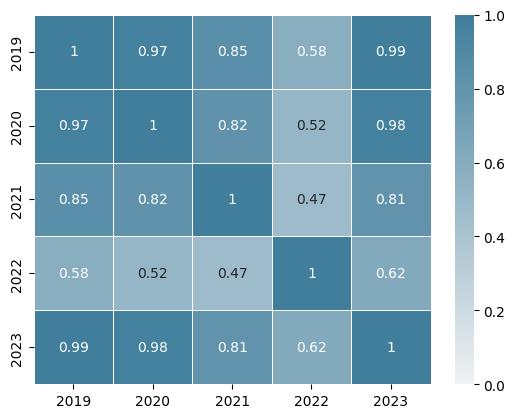

In [ ]:
sns.heatmap(
data=df.corr(),
cmap=sns.diverging_palette(20,230,as_cmap=True),
center=0,
vmin=0,
vmax=1,
linewidths=0.5,
annot=True,
)


# ANALISIS DE REGRESION SIMPLE


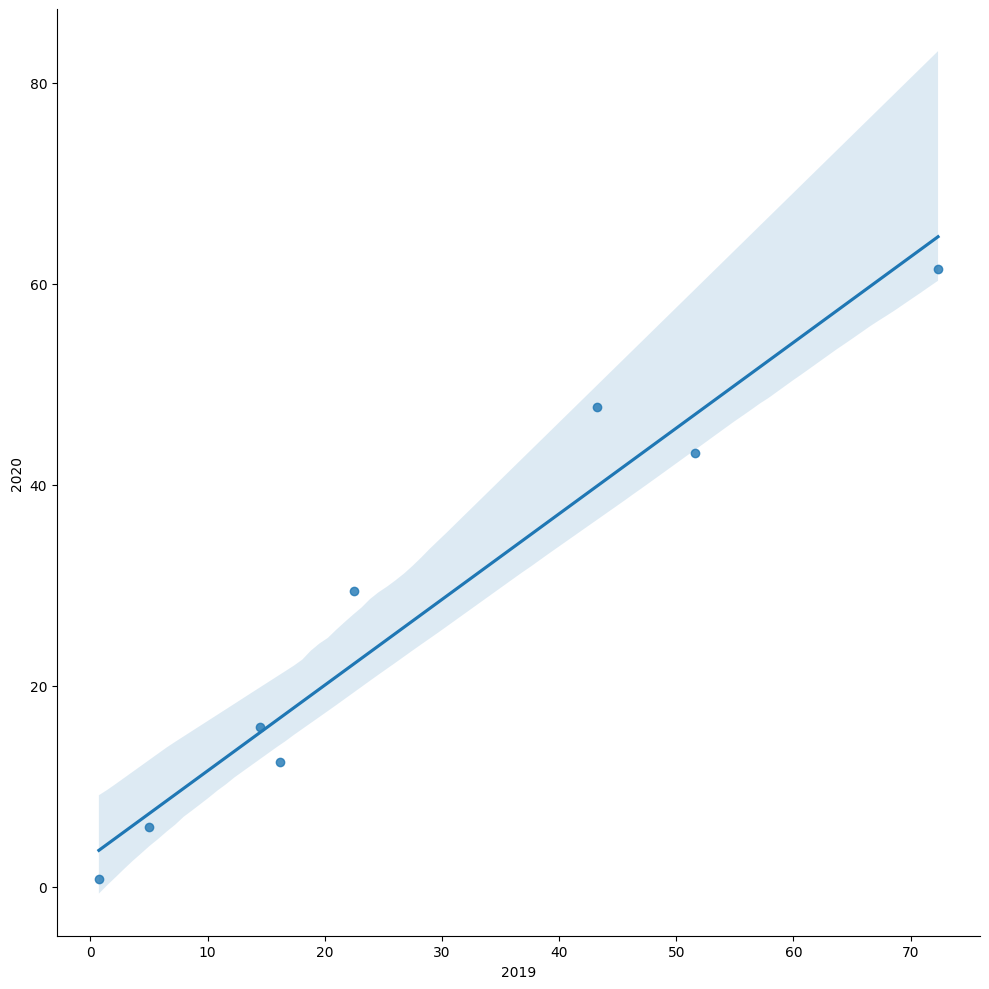

In [ ]:
sns.lmplot(
data=df,
x="2019",
y="2020",
height=10
)


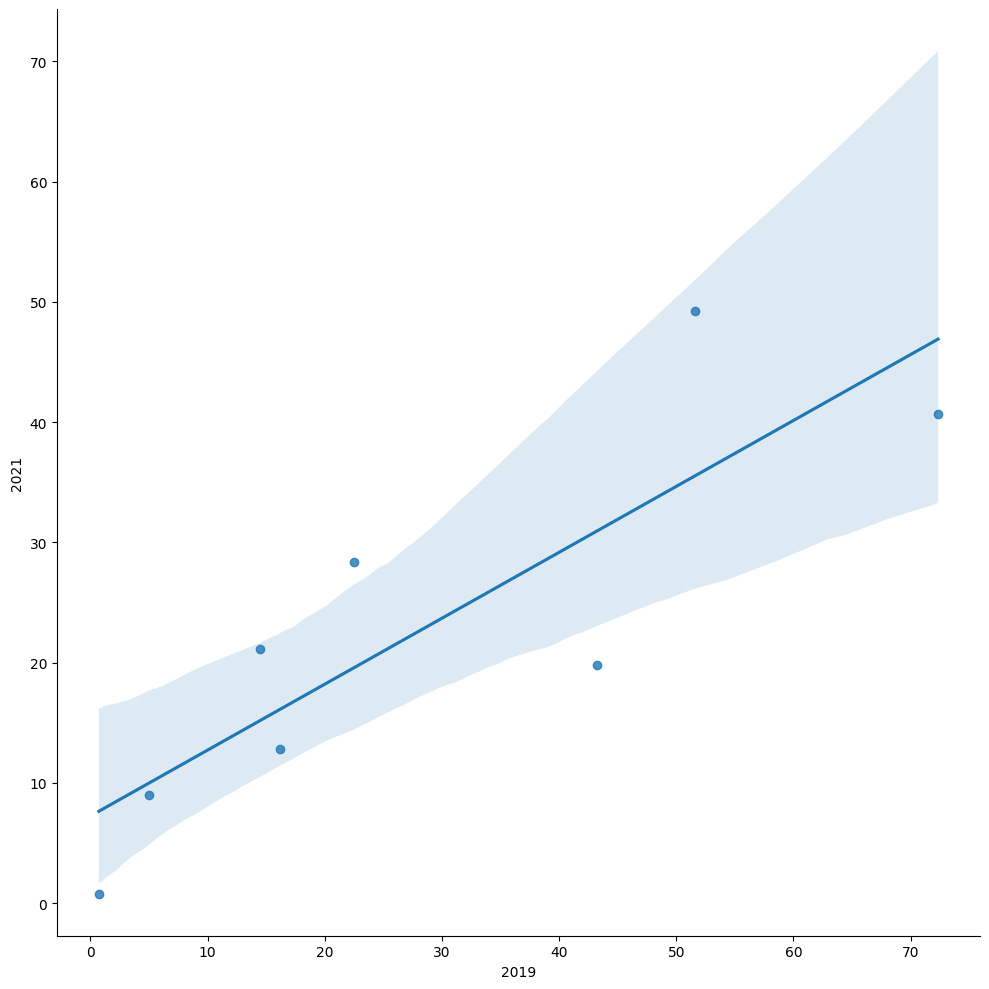

In [ ]:
sns.lmplot(
data=df,
x="2019",
y="2021",
height=10
)


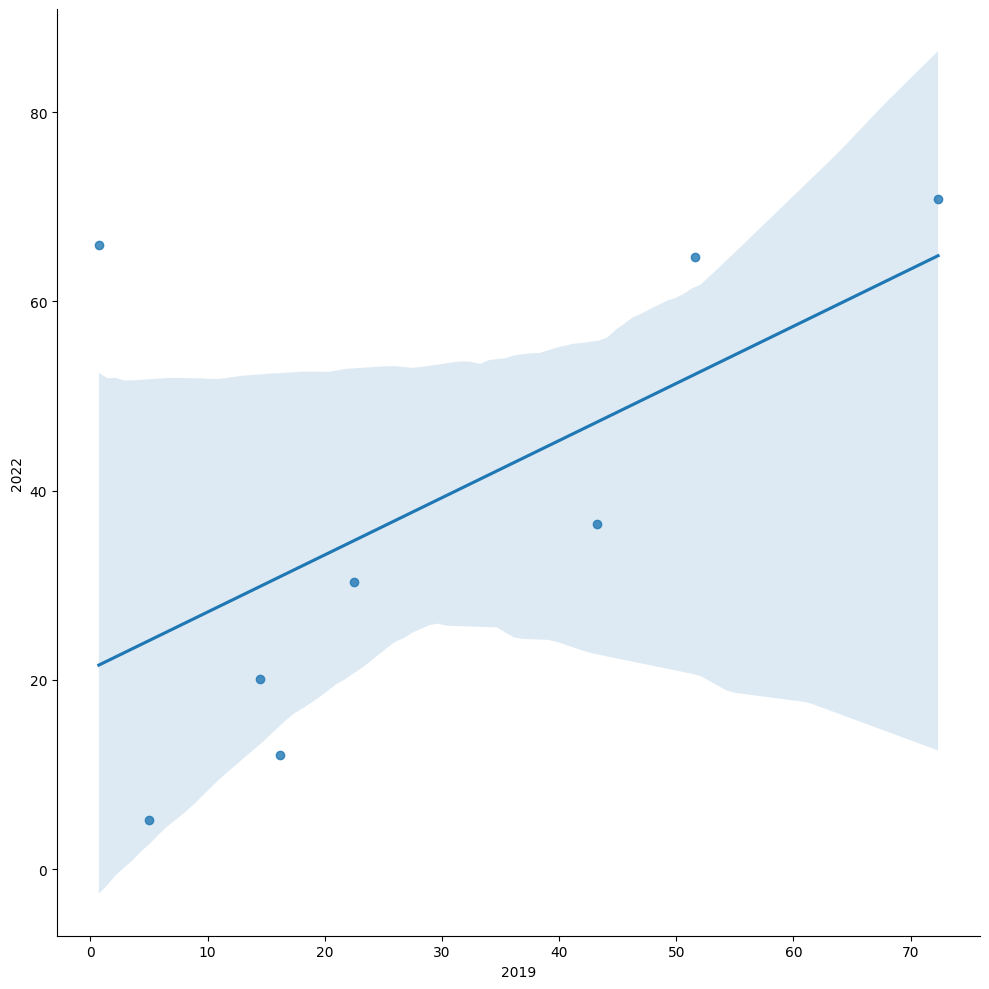

In [ ]:
sns.lmplot(
data=df,
x="2019",
y="2022",
height=10
)

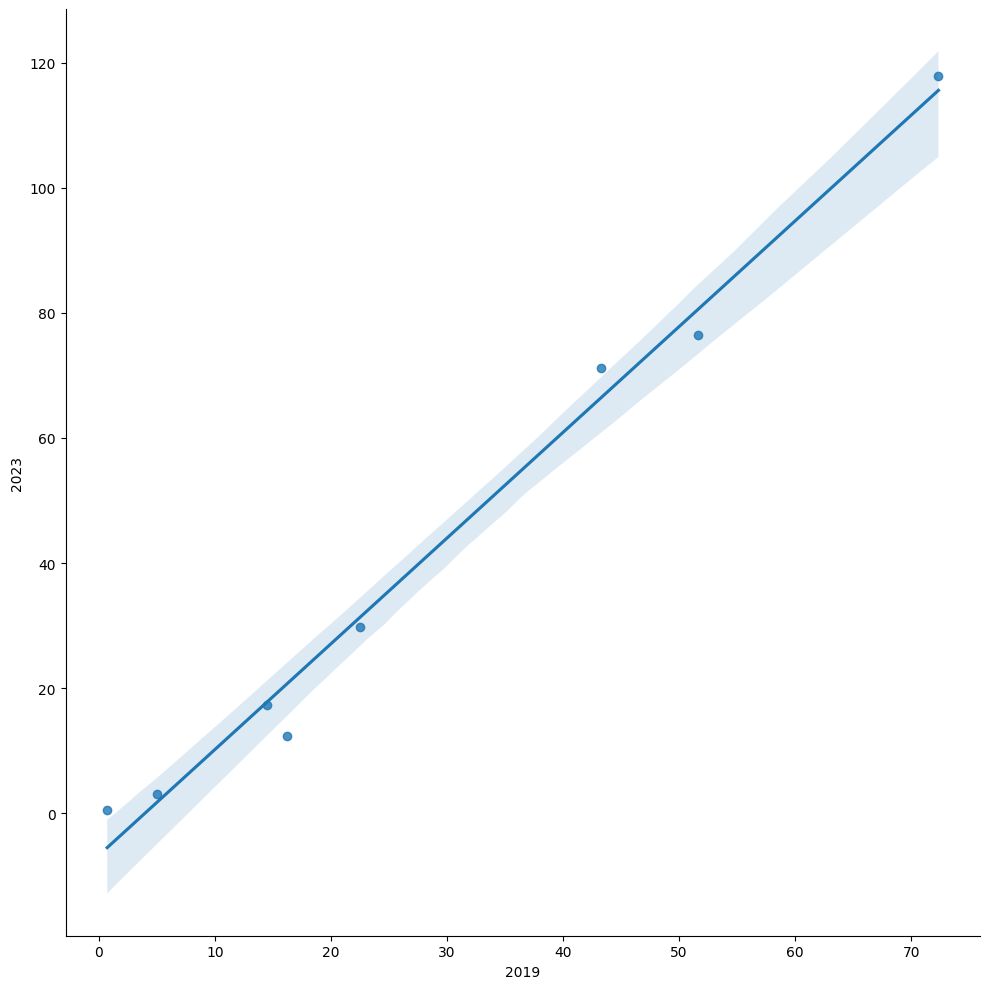

In [ ]:
sns.lmplot(
data=df,
x="2019",
y="2023",
height=10
)

# ANALISIS MULTIVARIADO

Modelo1

In [ ]:
model1= (
smf.ols(
data=df,
formula="Q('2019') ~ Q('2023')",
)
.fit()
)
model1.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Q('2019')   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     478.3
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           5.97e-07
Time:                        22:54:48   Log-Likelihood:                -19.007
No. Observations:                   8   AIC:                             42.01
Df Residuals:                       6   BIC:                             42.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2760      1.528      2.799      0.031       0.538       8.014
Q('2023')      0.5842      0.027     21.870      0.000       0.519       0.650
==============================================================================
Omnibus:                        0.365   Durbin-Watson:                   2.727
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.325
Skew:                           0.351   Prob(JB):                        0.850
Kurtosis:                       2.304   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo2

In [ ]:
model2= (
smf.ols(
data=df,
formula="Q('2019') ~ Q('2023') + Q('2020')",
)
.fit()
)
model2.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Q('2019')   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     205.7
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           1.58e-05
Time:                        22:56:41   Log-Likelihood:                -18.882
No. Observations:                   8   AIC:                             43.76
Df Residuals:                       5   BIC:                             44.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6107      2.346      1.539      0.184      -2.420       9.642
Q('2023')      0.5325      0.133      4.007      0.010       0.191       0.874
Q('2020')      0.1029      0.258      0.398      0.707      -0.561       0.767
==============================================================================
Omnibus:                        0.699   Durbin-Watson:                   2.911
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.457
Skew:                           0.485   Prob(JB):                        0.796
Kurtosis:                       2.345   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo3

In [ ]:
model3= (
smf.ols(
data=df,
formula="Q('2019') ~ Q('2023') + Q('2020') + Q('2021')",
)
.fit()
)
model3.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Q('2019')   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     184.2
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           9.66e-05
Time:                        22:57:30   Log-Likelihood:                -16.829
No. Observations:                   8   AIC:                             41.66
Df Residuals:                       4   BIC:                             41.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2659      2.189      1.035      0.359      -3.812       8.343
Q('2023')      0.5171      0.115      4.483      0.011       0.197       0.837
Q('2020')      0.0190      0.229      0.083      0.938      -0.618       0.656
Q('2021')      0.1870      0.114      1.638      0.177      -0.130       0.504
==============================================================================
Omnibus:                       15.477   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.768
Skew:                           1.801   Prob(JB):                       0.0559
Kurtosis:                       5.080   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo4

In [ ]:
model4= (
smf.ols(
data=df,
formula="Q('2019') ~ Q('2023') + Q('2020') + Q('2021') + Q('2022')",
)
.fit()
)
model4.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Q('2019')   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     144.5
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           0.000925
Time:                        22:58:35   Log-Likelihood:                -15.507
No. Observations:                   8   AIC:                             41.01
Df Residuals:                       3   BIC:                             41.41
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6798      3.091      1.514      0.227      -5.157      14.517
Q('2023')      0.6174      0.146      4.229      0.024       0.153       1.082
Q('2020')     -0.1357      0.266     -0.510      0.645      -0.982       0.711
Q('2021')      0.1943      0.112      1.736      0.181      -0.162       0.550
Q('2022')     -0.0657      0.061     -1.084      0.358      -0.259       0.127
==============================================================================
Omnibus:                        8.576   Durbin-Watson:                   2.589
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.561
Skew:                           1.254   Prob(JB):                        0.278
Kurtosis:                       4.182   Cond. No.                         261.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
modelos_resultados= pd.DataFrame(
dict(
actual_value=df["2019"],
prediction_model1= model1.predict(),
prediction_model2= model2.predict(),
prediction_model3= model3.predict(),
prediction_model4= model4.predict(),
)
)
modelos_resultados

,actual_value,prediction_model1,prediction_model2,prediction_model3,prediction_model4
0,22.50,21.649767,22.479204,23.511191,22.567604
1,72.35,73.169470,72.731455,72.021491,72.404636
2,51.59,48.948959,48.775426,51.835391,51.351098
3,43.26,45.864437,46.429907,43.692121,43.614969
4,16.22,11.443971,11.419612,11.250088,12.281572
5,5.04,6.086950,5.872728,5.658684,7.192098
6,14.51,14.411655,14.488035,15.492028,16.018644
7,0.72,4.614791,3.993634,2.729005,0.759379


ECDFs

<Axes: ylabel='Proportion'>

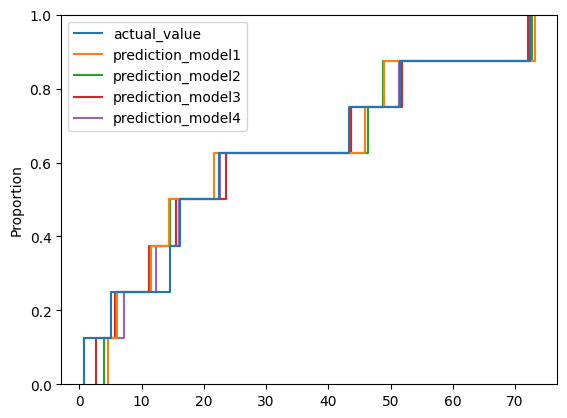

In [ ]:
sns.ecdfplot(
data=modelos_resultados
)


PDFs

<Axes: ylabel='Density'>

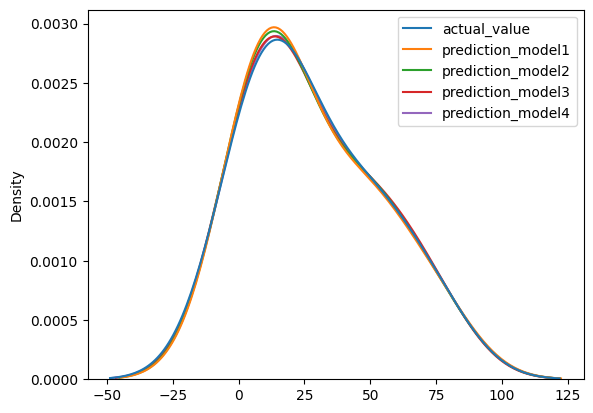

In [ ]:
sns.kdeplot(
data=modelos_resultados
)
